### Nama  : Vicky Jesflinto
### NIM   : H071221019
### Tugas 2 Pengantar Data Sains

---




## 1. Seleksi Unvariate

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
# memuat data
data = pd.read_csv("lol_euw_challanger.csv")
data.head(10)

,Unnamed: 0.1,Unnamed: 0,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,0,0,11.0,5.0,7.0,3.600000,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,1
1,1,1,21.0,11.0,13.0,3.090909,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,1
2,2,2,9.0,7.0,8.0,2.428571,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,1
3,3,3,11.0,2.0,2.0,6.500000,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,0
4,4,4,9.0,3.0,4.0,4.333333,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,1
5,5,5,8.0,8.0,3.0,1.375000,1.375000,413.748169,211.0,11950.0,149661.0,47.0,1.614476,7.0,3.0,0
6,6,6,3.0,8.0,3.0,0.750000,0.750000,348.295105,201.0,10850.0,140198.0,29.0,0.927520,48.0,46.0,0
7,7,7,2.0,4.0,4.0,1.500000,1.500000,425.994759,233.0,9975.0,166816.0,36.0,1.340082,9.0,14.0,1
8,8,8,8.0,2.0,9.0,8.500000,8.500000,476.120919,241.0,13200.0,204628.0,39.0,1.316739,6.0,6.0,1
9,9,9,12.0,4.0,6.0,4.500000,4.500000,541.163398,167.0,10025.0,118336.0,27.0,1.182769,84.0,76.0,1


In [13]:
# memilih data yang dibutuhkan
X = data.iloc[:,2:15]
y = data.iloc[:,-1]
print(X)

      kills  deaths  assists  killParticipation        kda  goldPerMinute  \
0      11.0     5.0      7.0           3.600000   3.600000     509.580253   
1      21.0    11.0     13.0           3.090909   3.090909     461.392738   
2       9.0     7.0      8.0           2.428571   2.428571     394.271504   
3      11.0     2.0      2.0           6.500000   6.500000     513.628158   
4       9.0     3.0      4.0           4.333333   4.333333     559.206714   
...     ...     ...      ...                ...        ...            ...   
5619    3.0     3.0      5.0           2.666667   2.666667     382.506309   
5620    7.0     3.0      3.0           3.333333   3.333333     464.027231   
5621   11.0     5.0     10.0           4.200000   4.200000     479.758054   
5622    6.0     3.0      9.0           5.000000   5.000000     422.451712   
5623   12.0     0.0      1.0          13.000000  13.000000     620.621693   

      totalMinionsKilled     gold  totalDamageDealt  visionScore  \
0      

In [14]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Game Statistic','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Game Statistic         Score
8    totalDamageDealt  5.467780e+06
7                gold  2.775725e+05
5       goldPerMinute  1.638306e+04
3   killParticipation  5.724492e+03
4                 kda  5.724492e+03
2             assists  2.653710e+03
0               kills  1.935659e+03
1              deaths  1.074101e+03
6  totalMinionsKilled  6.195341e+02
9         visionScore  5.167767e+02




---



## 2. Feature Importance

In [16]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [18]:
# memuat data
data = pd.read_csv("lol_euw_challanger.csv")
X = data.iloc[:,2:15]
y = data.iloc[:,-1]

In [19]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.06303331 0.07713317 0.08534925 0.16721207 0.17956056 0.08035544
 0.0539563  0.05722323 0.05465146 0.04530032 0.04608767 0.04519905
 0.04493817]


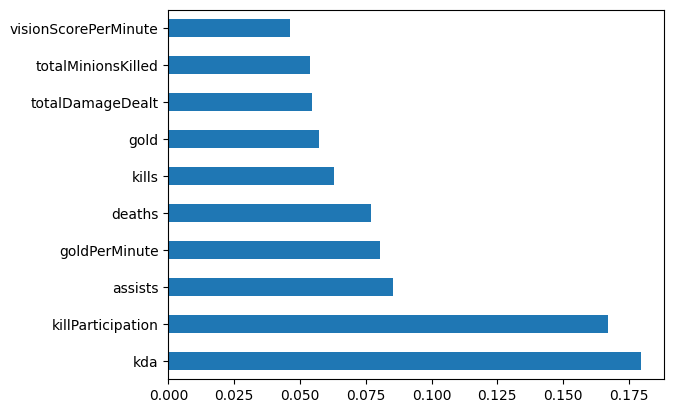

In [20]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



---



## 3. Matriks Korelasi dengan Heatmap

In [21]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [35]:
# memuat data
data = pd.read_csv("lol_euw_challanger.csv")
X = data.iloc[:,2:16]
y = data.iloc[:,-1]

In [36]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = X.corr()
top_corr_features = corrmat.index

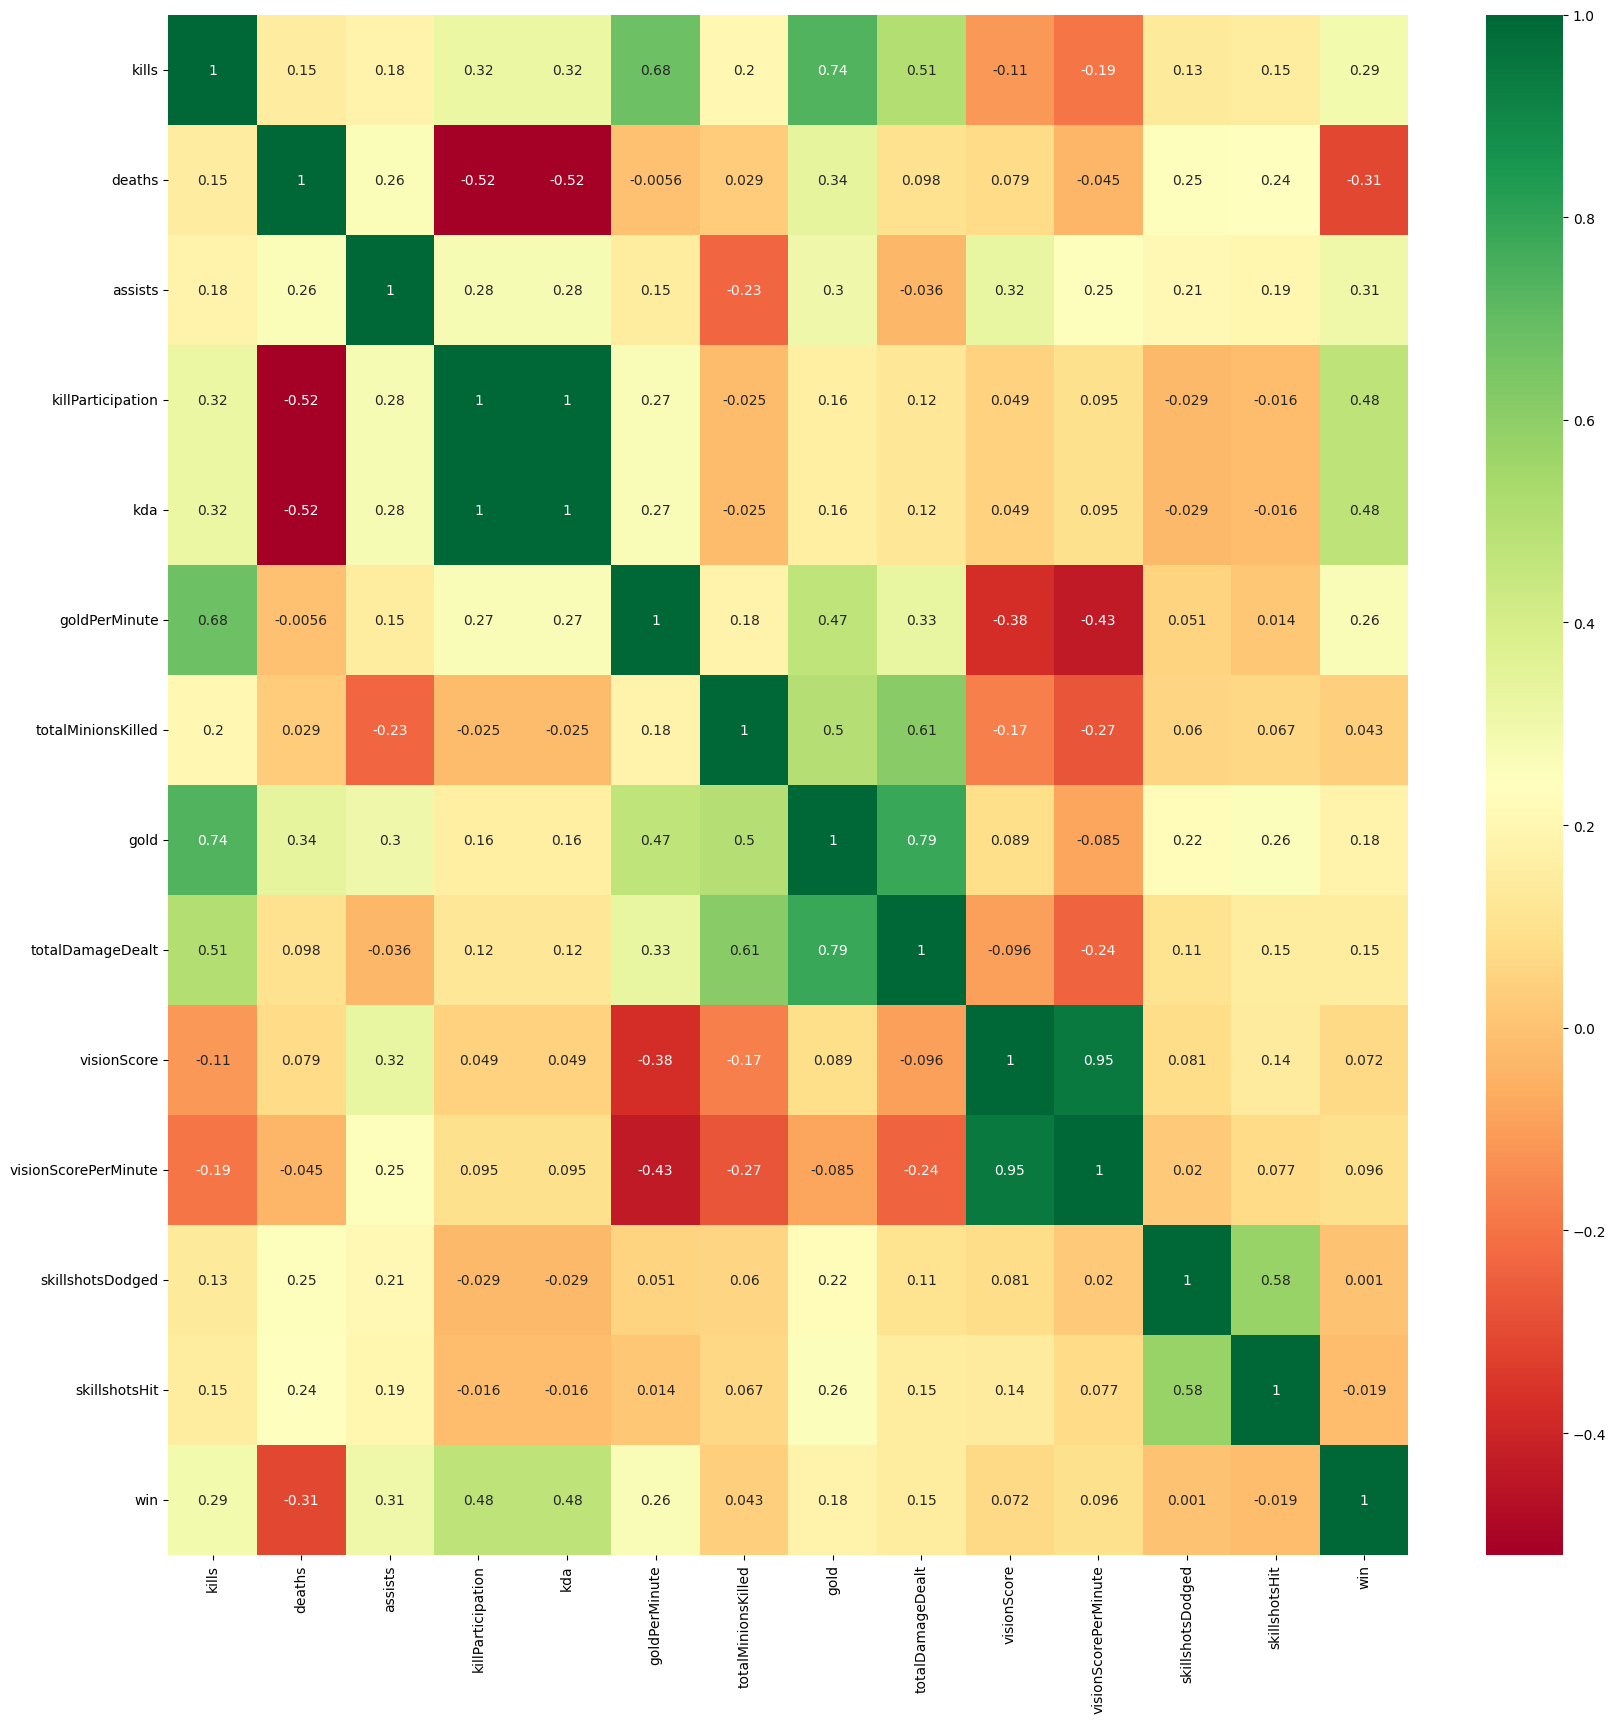

In [37]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan



*  Korelasi antara win dan deaths memiliki korelasi yang lemah, oleh karena itu perlu untuk meminimalisir kematian untuk mendapatkan kemenangan dalam game League of Legends
*   Pada baris win, terdapat korelasi yang kuat antara win dan killparticipation, begitupun win dan kda, kemudian disusul oleh kills, dan goldPerMinute

